# Elements of convex analysis

## Class 1b: Taylor expansion and Newton method

The purpose of this notebook is to play with Taylor's series. The notebook will use helper functions to create and draw functions (in [ex1b_helpers.py](ex1b_helpers.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib**  libraries,  **autograd** might be also helpful.

In [1]:
# a line making the graphs show up in the notebook
# you can safely ignore it (but run it!).
%matplotlib inline
import autograd.numpy as anp
import autograd

# Remider what Taylor's series around point $x_0$ looks like:
$P_m(x,x_0) = \sum\limits_{i=0}^{m}\frac{f^{(i)}(x_0)}{i!}(x-x_0)^i $

During implementation remember that factorial and $(x-x_0)^i$ both grow
exponentially fast so perhaps it's not a good idea to update them separately.

# Task 1
Find e (the math constant) using your knowledge about all derivatives of e and it's value at some known point

In [12]:
import numpy as np
def find_e(n):
    return np.sum([1/(np.math.factorial(i)) for i in range(n)]) 
print(find_e(20), np.e)

2.7182818284590446 2.718281828459045


# Task 2
Implement taylor expansion (for arbitrary function?) and visualize some approximations.

In [67]:
import numpy as np
from matplotlib import pyplot as plt

# handy function which takes original function and it's approximation
# and plots it from <a> to <b> using <points_num> number of points
def visualize(f, f_approx,a=-3,b=3,points_num=100,):
        x = np.linspace(a,b,points_num)
        f = f(x)
        f_approx = np.array([f_approx(xi) for xi in x])

        plt.plot(x, f,label="f(x)")
        plt.plot(x, f_approx, label="approximation")
        plt.legend()
        plt.show()

In [68]:
def fake_taylor_expansion(x, x_0, func, n):
    value = 0
    derivative = func # yeah, 0th derivative is the function itself, I know
    for i in range(n):
        value += (x-x_0)**i / np.math.factorial(i) * derivative(anp.array(x_0))
        derivative = autograd.grad(derivative)
    return value


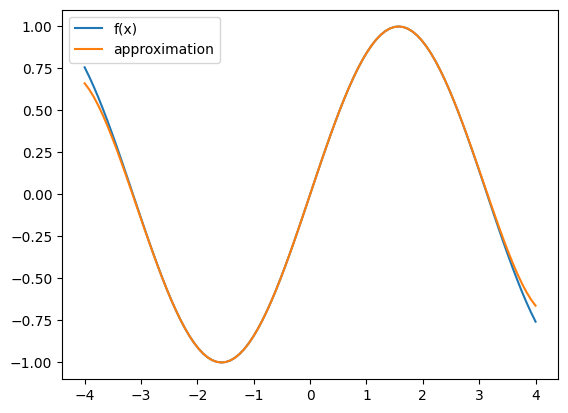

In [73]:
func = anp.exp
func = anp.sin #from -4,4 perhaps?

degree = 10
a,b = -4,4

my_approx_f = lambda x: fake_taylor_expansion(x, 0, func, n=degree)

visualize(f=func,
              f_approx=my_approx_f,
              a=a,b=b,
              points_num=100)